### **Importing Libraries**

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/heart.csv')

In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146482 entries, 0 to 146481
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      146482 non-null  object 
 1   BMI               146482 non-null  float64
 2   Smoking           146482 non-null  object 
 3   AlcoholDrinking   146482 non-null  object 
 4   Stroke            146482 non-null  object 
 5   PhysicalHealth    146482 non-null  float64
 6   MentalHealth      146482 non-null  float64
 7   DiffWalking       146482 non-null  object 
 8   Sex               146482 non-null  object 
 9   AgeCategory       146482 non-null  object 
 10  Race              146482 non-null  object 
 11  Diabetic          146482 non-null  object 
 12  PhysicalActivity  146482 non-null  object 
 13  GenHealth         146481 non-null  object 
 14  SleepTime         146481 non-null  float64
 15  Asthma            146481 non-null  object 
 16  KidneyDisease     14

In [ ]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,146482.000000,146482.000000,146482.000000,146481.000000
mean,28.243109,3.350808,3.908453,7.102935
std,6.351545,7.902670,7.928353,1.451533
min,12.020000,0.000000,0.000000,1.000000
25%,23.880000,0.000000,0.000000,6.000000
50%,27.260000,0.000000,0.000000,7.000000
75%,31.320000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


### **Exploratory Data Analysis**
   

In [ ]:
d = pd.DataFrame(data["HeartDisease"].value_counts())
fig = px.pie(d, values = "HeartDisease", names = ["No", "Yes"], hole = 0.40, opacity = 0.9,
            labels = {"label" :"Yes","No":"Number of Samples"})
fig.update_layout(title = dict(text = "Pie Chart of HeartDisease ratio"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

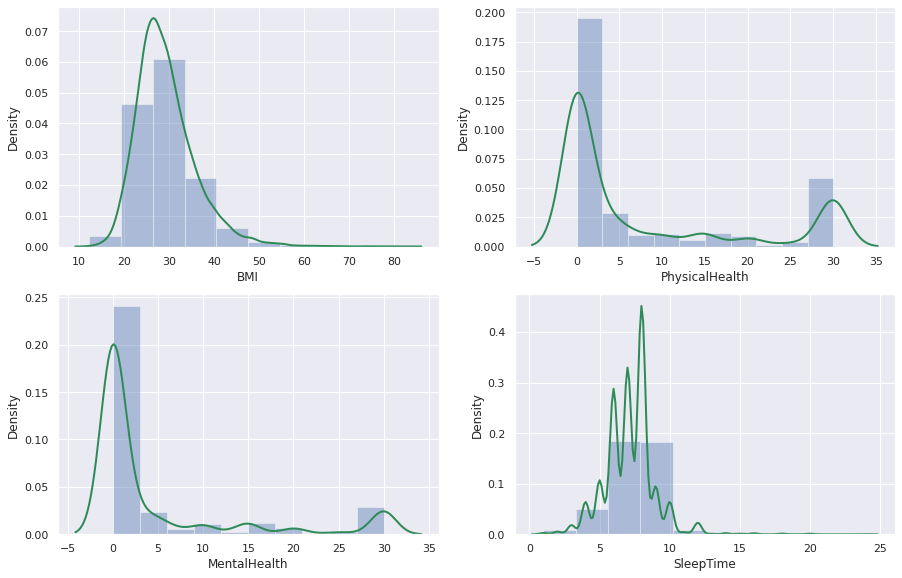

In [ ]:
# Data distribution of Numerical Variables
data_diseased = data[data['HeartDisease']=='Yes']
data2_diseased  = data_diseased.select_dtypes(include=['int', 'float'])
num_values = data2_diseased.columns
plt.figure(figsize=(15,15))
sns.set()
for i, var in enumerate(num_values):
    plt.subplot(3,2,i+1)
    sns.distplot(data2_diseased[var], bins=10, kde_kws={'linewidth':2, 'color':'seagreen'})

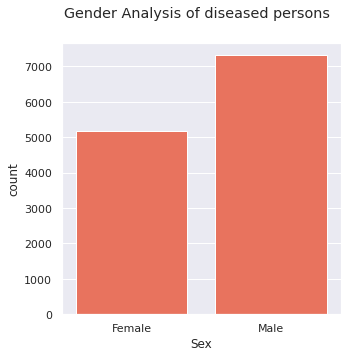

In [ ]:
plt.figure(figsize=(5,5))
sns.set()
plt.suptitle('Gender Analysis of diseased persons')
sns.countplot(data_diseased['Sex'], color = 'tomato')

**Race count plot of diseased persons**

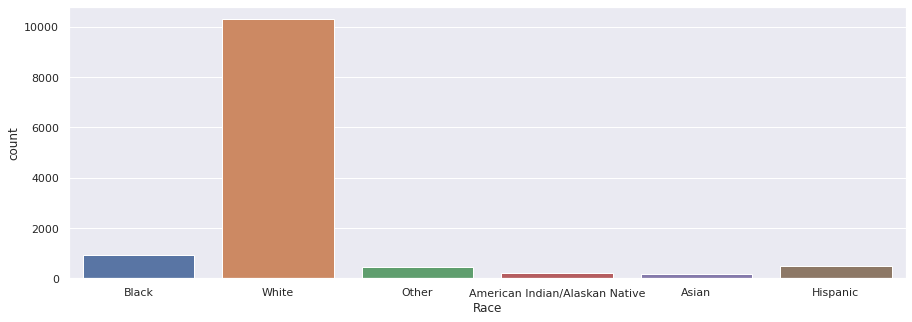

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data_diseased['Race'])

### **Data Cleaning**

In [ ]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### **Data Preprocessing**

In [ ]:
data2 = data.copy()
data2['HeartDisease'].replace({'Yes':1,'No':0},inplace=True)
data2['Smoking'].replace({'Yes':3,'No':2},inplace=True)
data2['AlcoholDrinking'].replace({'Yes':3,'No':2},inplace=True)
data2['Stroke'].replace({'Yes':3,'No':2},inplace=True)
data2['DiffWalking'].replace({'Yes':3,'No':2},inplace=True)
data2['Sex'].replace({'Male':3,'Female':2},inplace=True)
data2['Diabetic'].replace({'Yes':3,'No':2,'No, borderline diabetes':4,'Yes (during pregnancy)':5},inplace=True)
data2['PhysicalActivity'].replace({'Yes':3,'No':2},inplace=True)
data2['Asthma'].replace({'Yes':3,'No':2},inplace=True)
data2['KidneyDisease'].replace({'Yes':3,'No':2},inplace=True)
data2['SkinCancer'].replace({'Yes':3,'No':2},inplace=True)
data2['AgeCategory'].replace({'18-24':2,'25-29':3,'30-34':4,'35-39':5,'40-44':6,'45-49':7,'50-54':8,'55-59':9,'60-64':10,'65-69':11,'70-74':12,'75-79':13,'80 or older':14},inplace=True)
data2['Race'].replace({'White':2,'Black':3,'Asian':4,'American Indian/Alaskan Native':5,'Other':6,'Hispanic':7},inplace=True)
data2['GenHealth'].replace({'Very good':2,'Fair':3,'Good':4,'Poor':5,'Excellent':6},inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

### **Features selection**

In [ ]:
x = np.array(data2[list(data2.columns)[1:]])
y = np.array(data2['HeartDisease'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### **Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
y_labels = to_categorical(y_train)
# creating a model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(17,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
res = model.fit(x_train, y_labels, epochs=30, batch_size=20, validation_split=0.1)

Epoch 1/30
11513/11513 [==============================] - 41s 3ms/step - loss: 0.2536 - accuracy: 0.9150 - val_loss: 0.2474 - val_accuracy: 0.9138
Epoch 2/30
11513/11513 [==============================] - 34s 3ms/step - loss: 0.2409 - accuracy: 0.9150 - val_loss: 0.2418 - val_accuracy: 0.9143
Epoch 3/30
11513/11513 [==============================] - 34s 3ms/step - loss: 0.2367 - accuracy: 0.9153 - val_loss: 0.2390 - val_accuracy: 0.9142
Epoch 4/30
11513/11513 [==============================] - 34s 3ms/step - loss: 0.2344 - accuracy: 0.9155 - val_loss: 0.2365 - val_accuracy: 0.9149
Epoch 5/30
11513/11513 [==============================] - 33s 3ms/step - loss: 0.2327 - accuracy: 0.9155 - val_loss: 0.2341 - val_accuracy: 0.9143
Epoch 6/30
11513/11513 [==============================] - 34s 3ms/step - loss: 0.2321 - accuracy: 0.9158 - val_loss: 0.2334 - val_accuracy: 0.9149
Epoch 7/30
11513/11513 [==============================] - 33s 3ms/step - loss: 0.2319 - accuracy: 0.9158 - val_loss: 0

### **Evaluate the model**

In [ ]:
ann_predict = model.predict(x_test)

1999/1999 [==============================] - 3s 1ms/step


In [ ]:
yt_labels = to_categorical(y_test)
loss, acc = model.evaluate(x_test, yt_labels, verbose=0)
print('Test Accuracy: ', acc * 100)

Test Accuracy:  91.35540127754211


### **Machine learning model**

In [ ]:
model = RandomForestClassifier(max_features='sqrt')
forest = model.fit(x_train, y_train)

### **Model Evaluation and Results**

In [ ]:
forest_predict = forest.predict(x_test)

In [ ]:
acc_m = accuracy_score(y_test, forest_predict)
print('\nAccuracy of model\n\n-->', acc_m * 100,'%')


Accuracy of model

--> 90.43918760455917 %



Confusion-Matrix:
 [[57177  1190]
 [ 4925   667]]


Total records given: 63959

Actual diseased person: 58367
True predictions of diseased persons: 57177
False predictions of diseased persons: 1190
Accuracy: 97.96 %

Actual Healthy persons: 5592
True predictions of Healthy persons: 4925
False predictions of Healthy persons: 667
Accuracy: 88.07 %





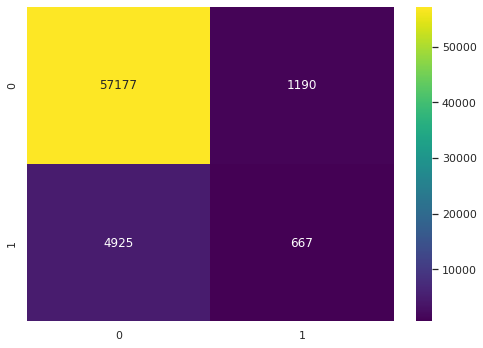

In [ ]:
cm = confusion_matrix(y_test, forest_predict)
print('\nConfusion-Matrix:\n',cm)
print('\n\nTotal records given:',len(x_test))
actual_dp = cm[0][0] + cm[0][1]
actual_hp = cm[1][0] + cm[1][1]
tp = cm[0][0]
tn =  cm[1][0]
print('\nActual diseased person:',actual_dp)
print('True predictions of diseased persons:',tp)
print('False predictions of diseased persons:',cm[0][1])
print('Accuracy:',round(tp/actual_dp * 100,2), '%')
print('\nActual Healthy persons:',actual_hp)
print('True predictions of Healthy persons:',tn)
print('False predictions of Healthy persons:',cm[1][1])
print('Accuracy:',round(tn/actual_hp * 100,2), '%')
print('\n\n')
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, forest_predict),annot=True, fmt='g',cmap='viridis')
plt.tight_layout()
plt.show()

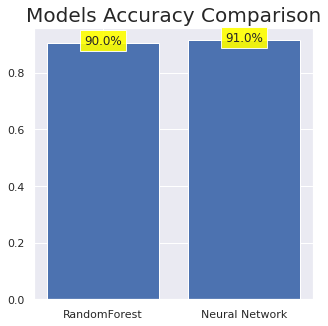

In [ ]:
models_acc = [acc_m, acc]
models_names = ['RandomForest', 'Neural Network']
plt.figure(figsize=(5,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy Comparison", fontsize=20)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(models_acc[i],2),f"{round(models_acc[i],2) * 100}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()